<h1>Data Reading Process </h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
Cancer = pd.read_csv('Prostate_Cancer2.csv')

In [6]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [7]:
Cancer.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [8]:
Cancer.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [9]:
Cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [10]:
Cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

diagnosis_result is the most important column for us. Because we'll classify datas depend on this column.
We have to integers for classification. Therefore, we must convert them from object to integer.

In [11]:
Cancer.diagnosis_result = [1 if each == 'M' else 0 for each in Cancer.diagnosis_result]

In [12]:
Cancer.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

And then, we assigned 1 and 0 to M and B. Let's some classification! We should assign x and y values for test-train datas split.

In [13]:
y = Cancer.diagnosis_result.values
x_data = Cancer.drop(['diagnosis_result'],axis=1)

In [14]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [17]:
x_data.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,14,16,78,386,0.070,0.284,0.260,0.097
4,5,9,19,135,1297,0.141,0.133,0.181,0.059


Normalization: Normalization means all of the values of data, scale between 0 and 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

In [20]:
x

array([[0.        , 0.875     , 0.0625    , 0.825     , 0.44868735,
        1.        , 0.78175896, 0.63313609, 0.59090909],
       [0.01010101, 0.        , 0.125     , 0.675     , 0.67064439,
        1.        , 0.13355049, 0.27218935, 0.09090909],
       [0.02020202, 0.75      , 1.        , 0.65      , 0.59725537,
        0.75342466, 0.39739414, 0.4260355 , 0.15909091],
       [0.03030303, 0.3125    , 0.3125    , 0.21666667, 0.1097852 ,
        0.        , 0.80130293, 0.73964497, 1.        ],
       [0.04040404, 0.        , 0.5       , 0.69166667, 0.65334129,
        0.97260274, 0.30944625, 0.27218935, 0.13636364],
       [0.05050505, 1.        , 0.875     , 0.25833333, 0.16408115,
        0.79452055, 0.42996743, 0.43786982, 0.52272727],
       [0.06060606, 0.4375    , 0.9375    , 0.56666667, 0.5       ,
        0.34246575, 0.23127036, 0.26035503, 0.09090909],
       [0.07070707, 0.375     , 0.4375    , 0.31666667, 0.22434368,
        0.67123288, 0.41368078, 0.50295858, 0.5       ],


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

method_names=[] 
method_scores=[]

In [22]:
x_train

array([[0.55555556, 0.5625    , 0.125     , 0.175     , 0.12350835,
        0.34246575, 0.05537459, 0.33727811, 0.13636364],
       [0.88888889, 0.125     , 0.        , 0.23333333, 0.1575179 ,
        0.24657534, 0.18241042, 0.34319527, 0.25      ],
       [0.26262626, 0.0625    , 0.8125    , 0.375     , 0.26431981,
        0.47945205, 0.48534202, 0.53254438, 0.36363636],
       [0.42424242, 0.125     , 0.        , 0.63333333, 0.53818616,
        0.28767123, 0.58957655, 0.56804734, 0.22727273],
       [0.6969697 , 0.5       , 0.625     , 0.24166667, 0.17959427,
        0.38356164, 0.04560261, 0.14201183, 0.09090909],
       [0.15151515, 0.8125    , 0.5       , 0.375     , 0.27267303,
        0.60273973, 0.39739414, 0.56213018, 0.40909091],
       [0.4040404 , 0.9375    , 0.3125    , 0.28333333, 0.21539379,
        0.16438356, 0.07166124, 0.25443787, 0.06818182],
       [0.96969697, 0.8125    , 0.1875    , 0.21666667, 0.14856802,
        0.47945205, 0.10749186, 0.32544379, 0.29545455],


<b> Logistic Regression <b>

Logistic Regression Classification Test Accuracy 0.85


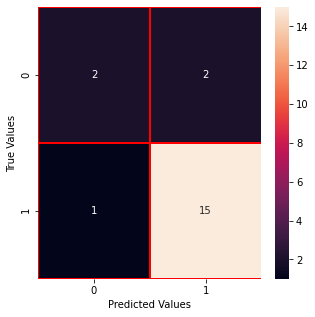

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

<b>Support Vector Machine <b>

SVM Classification Score is: 0.8


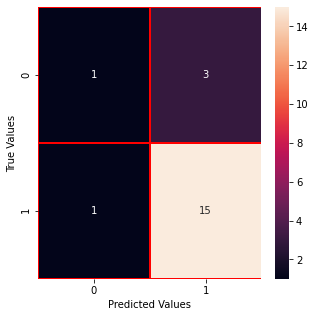

In [25]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))


y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

<b>Decision Tree<b>

Decision Tree Classification Score:  0.7


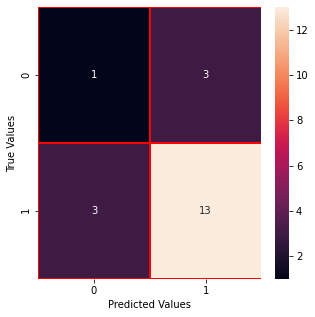

In [26]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))


y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

<b>Random Forest<b>
    

Random Forest Classification Score:  0.75


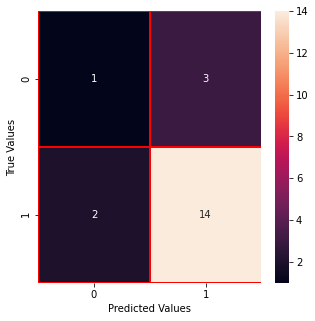

In [27]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))


y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200
2/2 [==============================] - 1s 6ms/step - loss: 0.6931 - accuracy: 0.5731
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5419
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5627
Epoch 4/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5523
Epoch 5/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5523
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5314
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5523
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5314
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5627
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5314
Epoch 11/200
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.9623
Epoch 85/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.9310
Epoch 86/200
2/2 [==============================] - 0s 998us/step - loss: 0.3805 - accuracy: 0.9310
Epoch 87/200
2/2 [==============================] - 0s 999us/step - loss: 0.3482 - accuracy: 0.9518
Epoch 88/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.9414
Epoch 89/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.9414
Epoch 90/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.9310
Epoch 91/200
2/2 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.9414
Epoch 92/200
2/2 [==============================] - 0s 3ms/step - loss: 0.3552 - accuracy: 0.9414
Epoch 93/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.9623
Epoch 94/200
2/2 [===========

2/2 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.9184
Epoch 167/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9080
Epoch 168/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9184
Epoch 169/200
2/2 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.9184
Epoch 170/200
2/2 [==============================] - 0s 998us/step - loss: 0.2550 - accuracy: 0.9184
Epoch 171/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.9289
Epoch 172/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2392 - accuracy: 0.9289
Epoch 173/200
2/2 [==============================] - 0s 997us/step - loss: 0.2584 - accuracy: 0.9289
Epoch 174/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9289
Epoch 175/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9414
Epoch 176/200
2/2 [=

2/2 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7679
Epoch 49/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8013
Epoch 50/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.8139
Epoch 51/200
2/2 [==============================] - 0s 997us/step - loss: 0.5750 - accuracy: 0.8243
Epoch 52/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.8243
Epoch 53/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.8451
Epoch 54/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.8117
Epoch 55/200
2/2 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.8243
Epoch 56/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.8347
Epoch 57/200
2/2 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8473
Epoch 58/200
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.9037
Epoch 131/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8933
Epoch 132/200
2/2 [==============================] - 0s 998us/step - loss: 0.2493 - accuracy: 0.8933
Epoch 133/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8620
Epoch 134/200
2/2 [==============================] - 0s 997us/step - loss: 0.2853 - accuracy: 0.8829
Epoch 135/200
2/2 [==============================] - 0s 997us/step - loss: 0.2871 - accuracy: 0.8829
Epoch 136/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.8829
Epoch 137/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8933
Epoch 138/200
2/2 [==============================] - 0s 998us/step - loss: 0.2624 - accuracy: 0.8933
Epoch 139/200
2/2 [==============================] - 0s 995us/step - loss: 0.2439 - accuracy: 0.9037
Epoch 140/200


2/2 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.6177
Epoch 12/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.6177
Epoch 13/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.6177
Epoch 14/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6073
Epoch 15/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6073
Epoch 16/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.6281
Epoch 17/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.6281
Epoch 18/200
2/2 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6281
Epoch 19/200
2/2 [==============================] - 0s 998us/step - loss: 0.6844 - accuracy: 0.6281
Epoch 20/200
2/2 [==============================] - 0s 1ms/step - loss: 0.6843 - accuracy: 0.6073
Epoch 21/200
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8947
Epoch 95/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.9051
Epoch 96/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8947
Epoch 97/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8634
Epoch 98/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8843
Epoch 99/200
2/2 [==============================] - 0s 997us/step - loss: 0.2962 - accuracy: 0.8947
Epoch 100/200
2/2 [==============================] - 0s 996us/step - loss: 0.2776 - accuracy: 0.9051
Epoch 101/200
2/2 [==============================] - 0s 1ms/step - loss: 0.2917 - accuracy: 0.8947
Epoch 102/200
2/2 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8738
Epoch 103/200
2/2 [==============================] - 0s 999us/step - loss: 0.2708 - accuracy: 0.8947
Epoch 104/200
2/2 [====

2/2 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.8947
Epoch 176/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.8947
Epoch 177/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.8843
Epoch 178/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.8615
Epoch 179/200
2/2 [==============================] - 0s 993us/step - loss: 0.2581 - accuracy: 0.8387
Epoch 180/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.8492
Epoch 181/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8492
Epoch 182/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8492
Epoch 183/200
2/2 [==============================] - 0s 997us/step - loss: 0.2538 - accuracy: 0.8387
Epoch 184/200
2/2 [==============================] - 0s 2ms/step - loss: 0.2573 - accuracy: 0.8492
Epoch 185/200
2/2 [=

In [29]:
method_names.append("RNN")
method_scores.append(0.887)

Text(0, 0.5, 'Method Score')

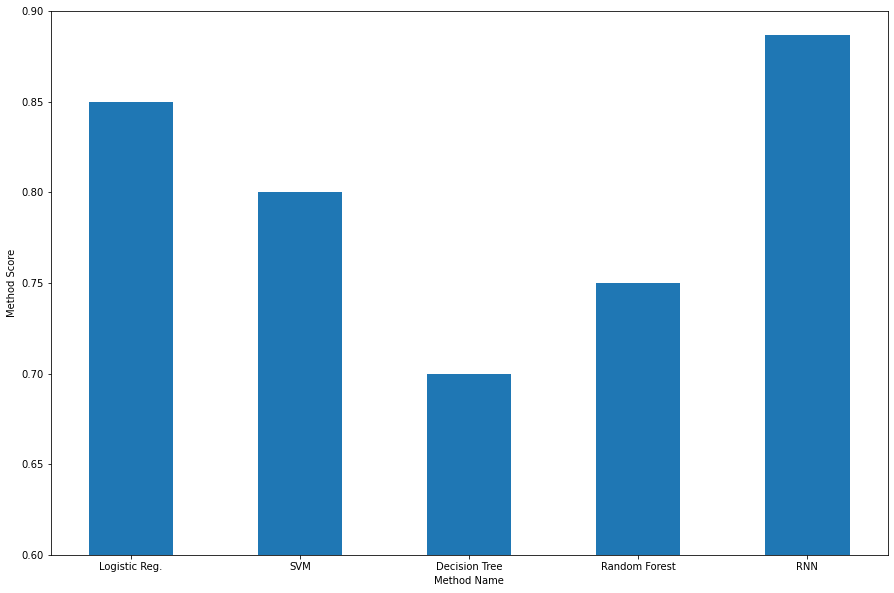

In [30]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')